In [1]:
# Dependencies
!pip install openweathermapy
!pip install citipy
import pandas as pd
import requests as req
import json
import random
import decimal
import openweathermapy.core as ow
from citipy import citipy
import matplotlib.pyplot as plt

cities = []
cityList = []
countryList = []
latList = []
lonList = []
print("Done!")

Done!


In [2]:
#Weather API
api = "60c3b6fd74c15e333021db51f560f13b"

#Generating cities
for x in range(500):
    lat = float(decimal.Decimal(random.randrange(-9000, 9000)/100))
    lon = float(decimal.Decimal(random.randrange(-18000, 18000)/100))
    cities.append(citipy.nearest_city(lat, lon))
    latList.append(lat)
    lonList.append(lon)

In [3]:
for x in cities:
    country = x.country_code
    city = x.city_name
    cityList.append(city)
    countryList.append(country)

    
places = {"Latitude": latList,
         "Longitude": lonList,
         "City":cityList,
         "Country":countryList}

placesDF = pd.DataFrame(places)
placesDF["Temperature"] = ""
placesDF["Humidity"] = ""
placesDF["Cloudiness"] = ""
placesDF["Wind Speed"] = ""

In [4]:
for index, row in placesDF.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?appid="
    url = url + api + "&units=imperial&q=%s,%s" % (row["City"],row["Country"])
    url = url.replace(" ", "+")
    weather = req.get(url).json()
    
    try:
        placesDF.set_value(index,"Temperature",weather["main"]["temp_max"])
        placesDF.set_value(index,"Humidity",weather["main"]["humidity"])
        placesDF.set_value(index,"Cloudiness",weather["clouds"]["all"])
        placesDF.set_value(index,"Wind Speed",weather["wind"]["speed"])
        print("--", end="")
    except:
        print("M", end="")
    

placesDF.head()

------M--M--------M----M------------M----------M--------M----------M--------------------MM------------------------------------------------------M------------------M------------------------------------------------------M------MM------------------M--M--------------M------------------------M--------------M------------M----M----------------------------------------------M----------------------------------------------------M----------------------M------------M--M------M----M--------------M------MMMM--M----------M------------------------MM--------------------------M----------M--M----------M--M--------------------M--------------------------------------------------M--M------MM----M--------M--M------------------------------MM--M--------M------------------------------M------------------------------M------------------M--M----MMM----------------------------------------M------------MM----------------M----------M--------M----M------

,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,souillac,mu,-56.25,76.97,73.4,88,40,3.36
1,punta arenas,cl,-53.48,-88.11,46.4,100,90,8.05
2,narsaq,gl,80.13,-60.76,17.6,67,48,4.7
3,nizhneyansk,ru,81.37,139.81,,,,
4,albany,au,-87.64,103.38,66.52,73,0,6.17


In [5]:
#Begin Plotting
placesDF["Temperature"] = pd.to_numeric(placesDF["Temperature"], errors = 'ignore')
placesDF["Humidity"] = pd.to_numeric(placesDF["Humidity"], errors = 'ignore')
placesDF["Cloudiness"] = pd.to_numeric(placesDF["Cloudiness"], errors = 'ignore')
placesDF["Wind Speed"] = pd.to_numeric(placesDF["Wind Speed"], errors = 'ignore')

placesDF.to_csv("Weather Data",index=False, header=True)

xAxis = placesDF["Latitude"]

yAxisTemp = placesDF["Temperature"]
yAxisHumid = placesDF["Humidity"]
yAxisCloud = placesDF["Cloudiness"]
yAxisWind = placesDF["Wind Speed"]

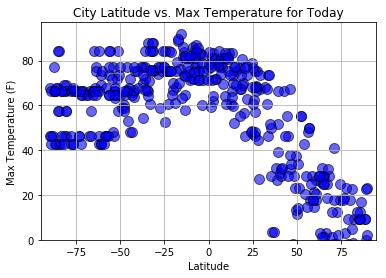

In [6]:
plt.scatter(xAxis, yAxisTemp,s = 100, facecolors = "blue", edgecolors = "black", alpha = .6)

plt.title("City Latitude vs. Max Temperature for Today")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

xMin = placesDF["Latitude"].min()
xMax = placesDF["Latitude"].max()
yMin = placesDF["Temperature"].min()
yMax = placesDF["Temperature"].max()
plt.xlim(xMin-5,xMax+5)
plt.ylim(0,yMax+5)
plt.grid('on')
plt.savefig("Temp Vs Lat.png")

plt.show()

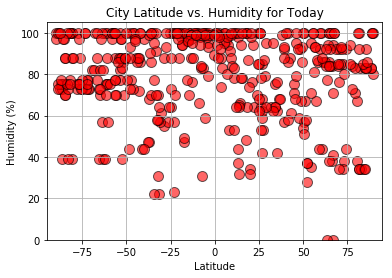

In [7]:
plt.scatter(xAxis, yAxisHumid,s=100, facecolors = "red", edgecolors = "black", alpha = .6)

plt.title("City Latitude vs. Humidity for Today")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

yMin = placesDF["Humidity"].min()
yMax = placesDF["Humidity"].max()
plt.xlim(xMin-5,xMax+5)
plt.ylim(0,yMax+5)
plt.grid('on')
plt.savefig("Hum Vs Lat.png")

plt.show()

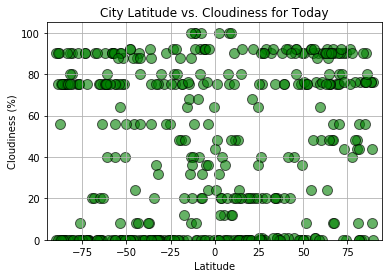

In [8]:
plt.scatter(xAxis, yAxisCloud,s=100, facecolors = "green", edgecolors = "black", alpha = .6)

plt.title("City Latitude vs. Cloudiness for Today")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

yMin = placesDF["Cloudiness"].min()
yMax = placesDF["Cloudiness"].max()
plt.xlim(xMin-5,xMax+5)
plt.ylim(0,yMax+5)
plt.grid('on')
plt.savefig("Cloud Vs Lat.png")

plt.show()

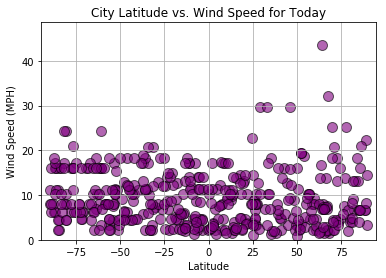

In [9]:
plt.scatter(xAxis, yAxisWind,s=100, facecolors = "purple", edgecolors = "black", alpha = .6)

plt.title("City Latitude vs. Wind Speed for Today")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")

yMin = placesDF["Wind Speed"].min()
yMax = placesDF["Wind Speed"].max()
plt.xlim(xMin-5,xMax+5)
plt.ylim(0,yMax+5)
plt.grid('on')
plt.savefig("Wind Vs Lat.png")

plt.show()

In [10]:
# The three observable trends:
#---1. There is a definite correlation between Max Temperature and latitude; The max temp increases the closer you get to the equator.
#---2. Although not to an extreme degree, you see less humid clients the closer you get to the equator
#---3. There seems to be less cloudiness near the equator. Not by much though.
#---4. The wind speed seems to be more random when considering location.